In [5]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "youtubetrendvideos"

In [6]:
India.data <- read_csv("/kaggle/input/youtubetrendvideos/INvideos.csv")
Japan.data <- read_csv("/kaggle/input/youtubetrendvideos/JPvideos.csv")
Mexico.data <- read_csv("/kaggle/input/youtubetrendvideos/MXvideos.csv")
France.data <- read_csv("/kaggle/input/youtubetrendvideos/FRvideos.csv")
Russia.data <- read_csv("/kaggle/input/youtubetrendvideos/RUvideos.csv")
US.data <- read_csv("/kaggle/input/youtubetrendvideos/USvideos.csv")
GB.data <- read_csv("/kaggle/input/youtubetrendvideos/GBvideos.csv")
Cannada.data <- read_csv("/kaggle/input/youtubetrendvideos/DEvideos.csv")
Germany.data <- read_csv("/kaggle/input/youtubetrendvideos/CAvideos.csv")

Rows: 37352 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): video_id, trending_date, title, channel_title, tags, thumbnail_lin...
dbl  (5): category_id, views, likes, dislikes, comment_count
lgl  (3): comments_disabled, ratings_disabled, video_error_or_removed
dttm (1): publish_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 20523 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): video_id, trending_date, title, channel_title, tags, thumbnail_lin...
dbl  (5): category_id, views, likes, dislikes, comment_count
lgl  (3): comments_disabled, ratings_disabled, video_error_or_removed
dttm (1): publish_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to qu

In [7]:
# Extracting Title length
GB.data$title_length =sapply(GB.data$title, nchar)
India.data$title_length =sapply(India.data$title, nchar)
France.data$title_length =sapply(France.data$title, nchar)
US.data$title_length =sapply(US.data$title, nchar)
Japan.data$title_length =sapply(Japan.data$title, nchar)
Germany.data$title_length =sapply(Germany.data$title, nchar)
Russia.data$title_length =sapply(Russia.data$title, nchar)
Mexico.data$title_length =sapply(Mexico.data$title, nchar)
Cannada.data$title_length =sapply(Cannada.data$title,nchar)

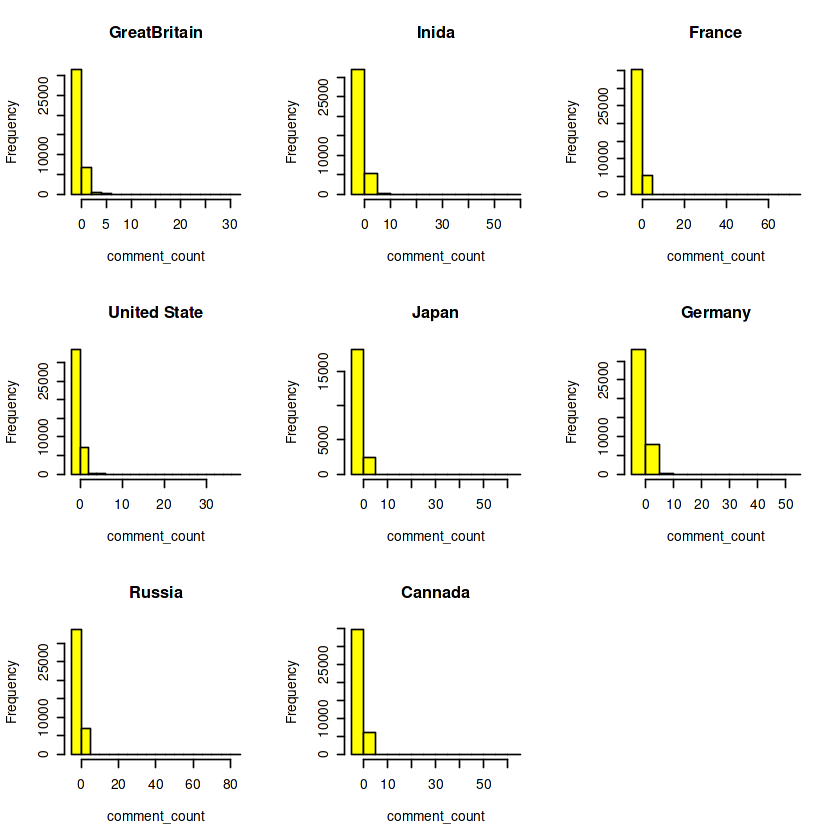

In [8]:
par(mfrow=c(3,3))
hist(scale(GB.data$comment_count), col = "yellow", main= paste("GreatBritain"), xlab = "comment_count")
hist(scale(India.data$comment_count), col = "yellow", main= paste("Inida"), xlab = "comment_count")
hist(scale(France.data$comment_count), col = "yellow", main= paste("France"), xlab = "comment_count")
hist(scale(US.data$comment_count), col = "yellow", main= paste("United State"), xlab = "comment_count")
hist(scale(Japan.data$comment_count), col = "yellow", main= paste("Japan"), xlab = "comment_count")
hist(scale(Germany.data$comment_count), col = "yellow", main= paste("Germany"), xlab = "comment_count")
hist(scale(Russia.data$comment_count), col = "yellow", main= paste("Russia"), xlab = "comment_count")
hist(scale(Cannada.data$comment_count), col = "yellow", main= paste("Cannada"), xlab = "comment_count")

In [9]:
library(corrplot)
cor_matrix1 <- cor(GB.data[,c("title_length","category_id","likes","views","dislikes") ])
cor_matrix2 <- cor(India.data[,c("title_length","category_id","likes","views","dislikes") ])
cor_matrix3 <- cor(France.data[,c("title_length","category_id","likes","views","dislikes") ])
cor_matrix4 <- cor(Russia.data[,c("title_length","category_id","likes","views","dislikes") ])
cor_matrix5 <- cor(Cannada.data[,c("title_length","category_id","likes","views","dislikes") ])
cor_matrix6 <- cor(US.data[,c("title_length","category_id","likes","views","dislikes") ])
cor_matrix7 <- cor(Germany.data[,c("title_length","category_id","likes","views","dislikes") ])
cor_matrix8 <- cor(Japan.data[,c("title_length","category_id","likes","views","dislikes") ])

corrplot 0.92 loaded



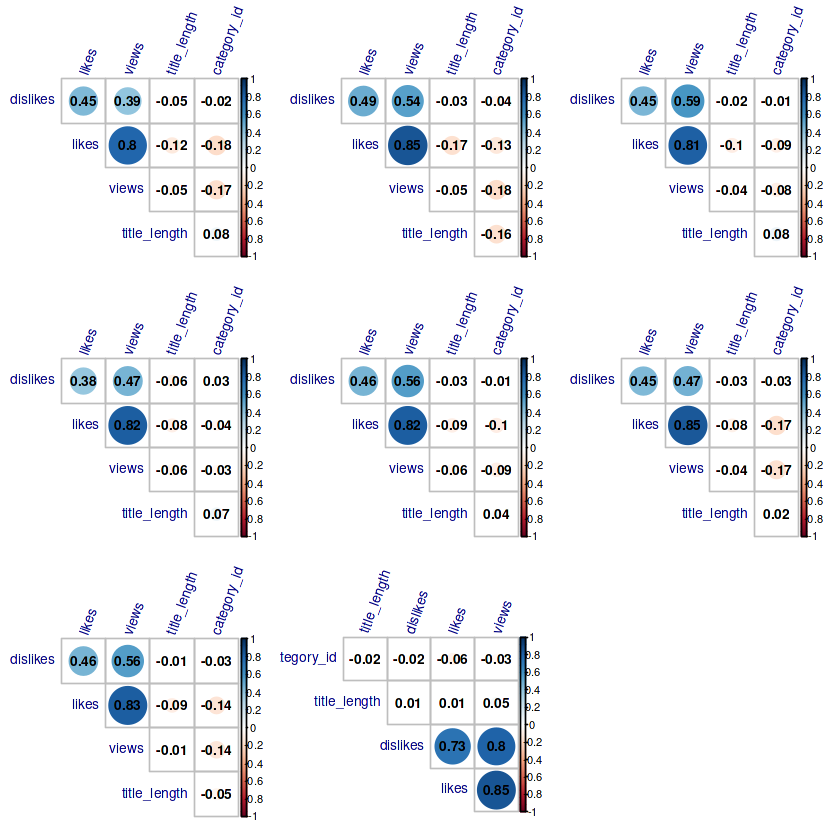

In [10]:
# Plot the correlation matrix
par(mfrow =c(3,3))
corrplot(cor_matrix1, type = "upper", order = "hclust", tl.col = "navy", tl.srt = 70, addCoef.col = "black", diag = F)
corrplot(cor_matrix2, type = "upper", order = "hclust", tl.col = "navy", tl.srt = 70, addCoef.col = "black", diag = F)
corrplot(cor_matrix3, type = "upper", order = "hclust", tl.col = "navy", tl.srt = 70, addCoef.col = "black", diag = F)
corrplot(cor_matrix4, type = "upper", order = "hclust", tl.col = "navy", tl.srt = 70, addCoef.col = "black", diag = F)
corrplot(cor_matrix5, type = "upper", order = "hclust", tl.col = "navy", tl.srt = 70, addCoef.col = "black", diag = F)
corrplot(cor_matrix6, type = "upper", order = "hclust", tl.col = "navy", tl.srt = 70, addCoef.col = "black", diag = F)
corrplot(cor_matrix7, type = "upper", order = "hclust", tl.col = "navy", tl.srt = 70, addCoef.col = "black", diag = F)
corrplot(cor_matrix8, type = "upper", order = "hclust", tl.col = "navy", tl.srt = 70, addCoef.col = "black", diag = F)


In [11]:
view1.data <- GB.data$views %>% as.integer() %>%as.data.frame() %>% rename( views=".")
view2.data <- India.data$views %>% as.integer() %>%as.data.frame() %>% rename( views=".")
view3.data <- France.data$views %>% as.integer() %>%as.data.frame() %>% rename( views=".")
view4.data <- Russia.data$views %>% as.integer() %>%as.data.frame() %>% rename( views=".")
view5.data <- Cannada.data$views %>% as.integer() %>%as.data.frame() %>% rename( views=".")
view6.data <- US.data$views %>% as.integer() %>%as.data.frame() %>% rename( views=".")
view7.data <- Germany.data$views %>% as.integer() %>%as.data.frame() %>% rename( views=".")
view8.data <- Japan.data$views %>% as.integer() %>%as.data.frame() %>% rename( views=".")


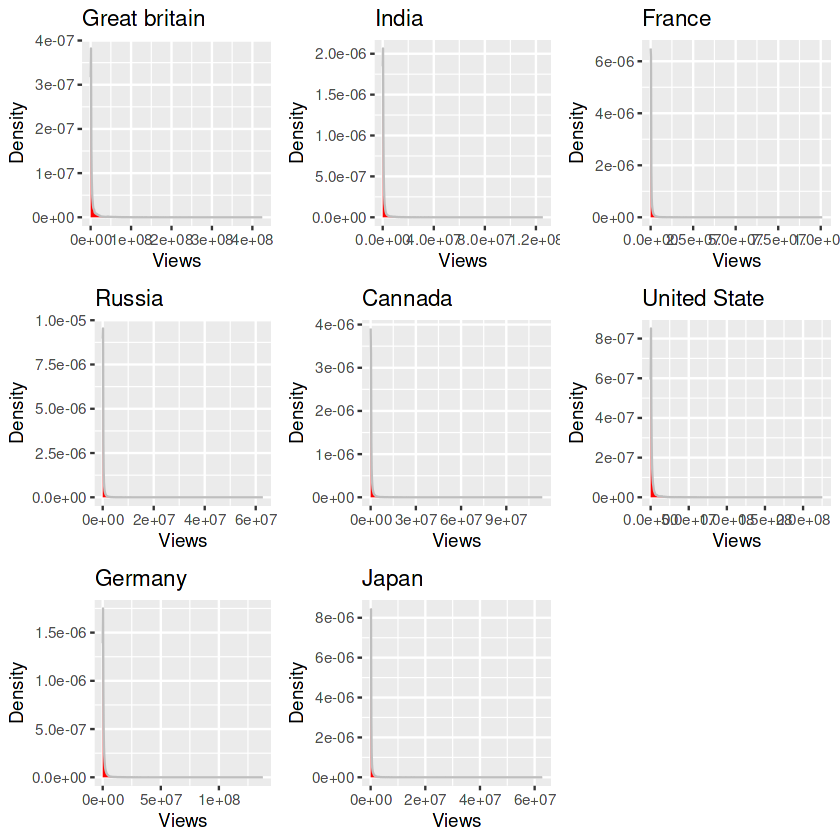

In [13]:
library(cowplot)


p1 <- ggplot(data = view1.data, aes(x = views)) + 
  geom_density(fill = "red", color = "grey", alpha = 1.44) +
  xlab("Views") +
  ylab("Density") +
  ggtitle("Great britain")

p2 <- ggplot(data = view2.data, aes(x = views)) + 
  geom_density(fill = "red", color = "grey", alpha = 1.44) +
  xlab("Views") +
  ylab("Density") +
  ggtitle("India")

p3 <- ggplot(data = view3.data, aes(x = views)) + 
  geom_density(fill = "red", color = "grey", alpha = 1.44) +
  xlab("Views") +
  ylab("Density") +
  ggtitle("France")

p4 <- ggplot(data = view4.data, aes(x = views)) + 
  geom_density(fill = "red", color = "grey", alpha = 1.44) +
  xlab("Views") +
  ylab("Density") +
  ggtitle("Russia")

p5 <- ggplot(data = view5.data, aes(x = views)) + 
  geom_density(fill = "red", color = "grey", alpha = 1.44) +
  xlab("Views") +
  ylab("Density") +
  ggtitle("Cannada")

p6 <- ggplot(data = view6.data, aes(x = views)) + 
  geom_density(fill = "red", color = "grey", alpha = 1.44) +
  xlab("Views") +
  ylab("Density") +
  ggtitle("United State")

p7 <- ggplot(data = view7.data, aes(x = views)) + 
  geom_density(fill = "red", color = "grey", alpha = 1.44) +
  xlab("Views") +
  ylab("Density") +
  ggtitle("Germany")

p8 <- ggplot(data = view8.data, aes(x = views)) + 
  geom_density(fill = "red", color = "grey", alpha = 1.44) +
  xlab("Views") +
  ylab("Density") +
  ggtitle("Japan")

plot_grid(p1, p2,p3,p4,p5,p6,p7,p8, ncol = 3)

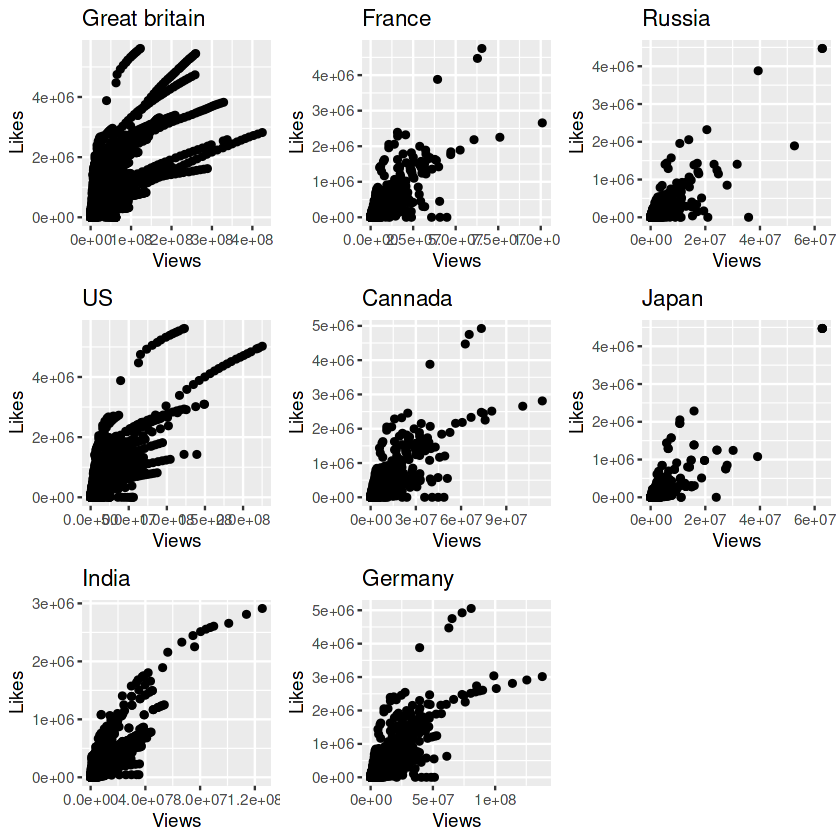

In [14]:
x1 <- ggplot(data = GB.data, aes(x = views, y = likes),) +
  geom_point() +
  labs(x = "Views", y = "Likes") +
  ggtitle("Great britain")

x2 <- ggplot(data = France.data, aes(x = views, y = likes),) +
  geom_point() +
  labs(x = "Views", y = "Likes") +
  ggtitle("France")

x3 <- ggplot(data = Russia.data, aes(x = views, y = likes),) +
  geom_point() +
  labs(x = "Views", y = "Likes") +
  ggtitle("Russia")

x4 <- ggplot(data = US.data, aes(x = views, y = likes),) +
  geom_point() +
  labs(x = "Views", y = "Likes") +
  ggtitle("US")

x5 <- ggplot(data = Cannada.data, aes(x = views, y = likes),) +
  geom_point() +
  labs(x = "Views", y = "Likes") +
  ggtitle("Cannada")

x6 <- ggplot(data = Japan.data, aes(x = views, y = likes),) +
  geom_point() +
  labs(x = "Views", y = "Likes") +
  ggtitle("Japan")

x7 <- ggplot(data = India.data, aes(x = views, y = likes),) +
  geom_point() +
  labs(x = "Views", y = "Likes") +
  ggtitle("India")

x8 <- ggplot(data = Germany.data, aes(x = views, y = likes),) +
  geom_point() +
  labs(x = "Views", y = "Likes") +
  ggtitle("Germany")

plot_grid(x1, x2,x3,x4,x5,x6,x7,x8, ncol = 3)

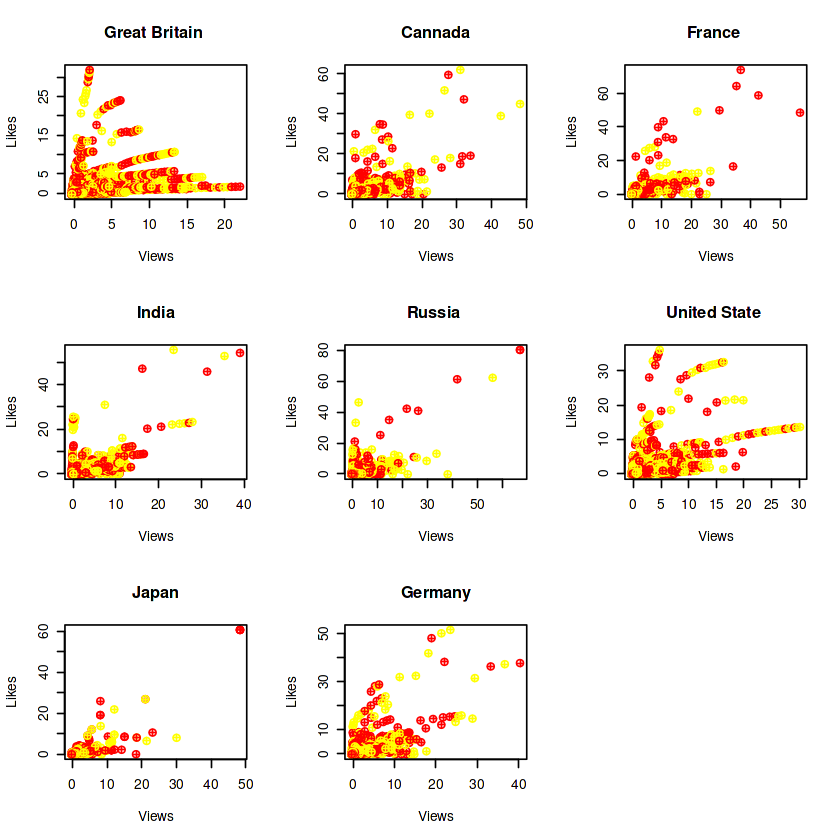

In [15]:
par(mfrow =c(3,3))

plot(scale(GB.data$views), scale(GB.data$comment_count), col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = "Great Britain ")
plot(scale(Cannada.data$views), scale(Cannada.data$comment_count), col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = "Cannada")
plot(scale(France.data$views), scale(France.data$comment_count), col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = "France ")
plot(scale(India.data$views), scale(India.data$comment_count), col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = "India")
plot(scale(Russia.data$views), scale(Russia.data$comment_count), col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = "Russia ")
plot(scale(US.data$views), scale(US.data$comment_count), col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = "United State ")
plot(scale(Japan.data$views), scale(Japan.data$comment_count), col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = "Japan")
plot(scale(Germany.data$views), scale(Germany.data$comment_count), col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = "Germany")



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




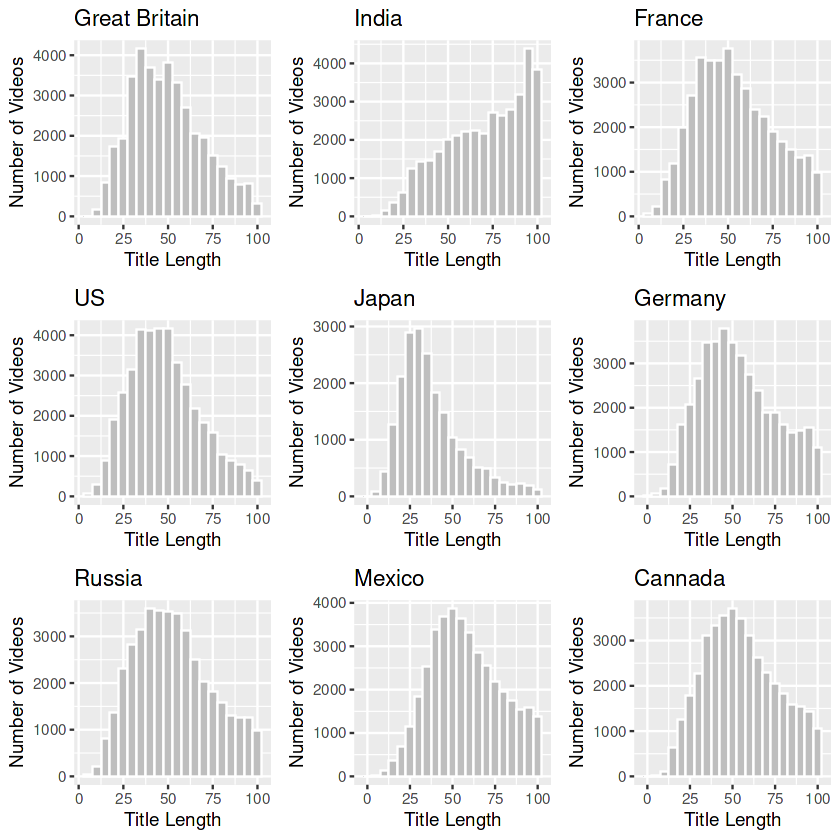

In [16]:
# create a list of all the data frames
country_data <- list(GB.data, India.data, France.data, US.data, Japan.data, Germany.data, Russia.data, Mexico.data, Cannada.data)

# create a list of all the country names
country_names <- c("Great Britain", "India", "France", "US", "Japan", "Germany", "Russia", "Mexico", "Cannada")

# create an empty list to store the plots
plots <- list()

# loop through the data and generate a histogram for each country
for(i in seq_along(country_data)) {
  plt <- ggplot(data = country_data[[i]], aes(x = title_length)) +
    geom_histogram(binwidth = 5, fill = "grey", color = "white") +
    labs(x = "Title Length", y = "Number of Videos") +
    ggtitle(country_names[i])
  plots[[i]] <- plt
}

# combine all the plots using grid.arrange() from the gridExtra package
library(gridExtra)
grid.arrange(grobs = plots, ncol = 3)

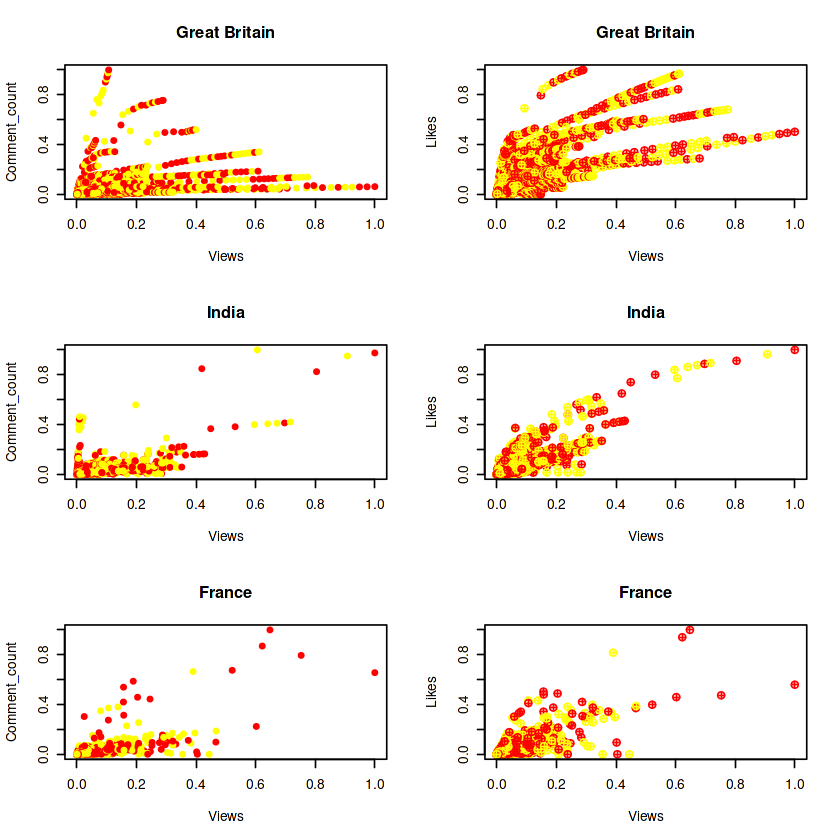

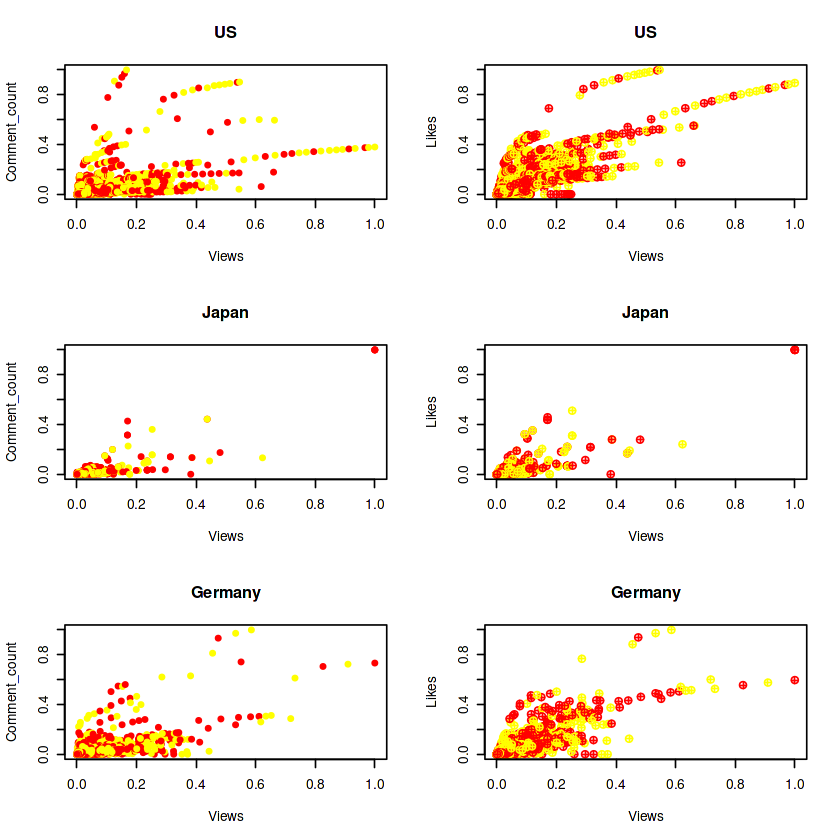

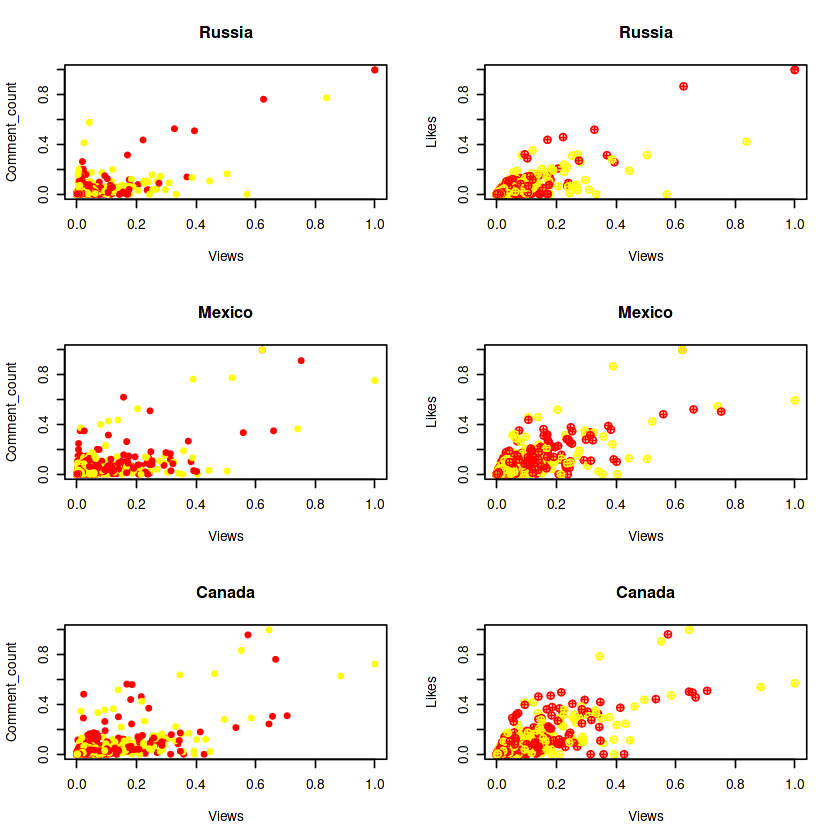

In [19]:
par(mfrow=c(3,2))
normalize_data <- function(data, country) {
  data_norm <- data
  data_norm$views <- (data$views - min(data$views)) / (max(data$views) - min(data$views))
  data_norm$likes <- (data$likes - min(data$likes)) / (max(data$likes) - min(data$likes))
  data_norm$comment_total <- (data$comment_count - min(data$comment_count)) / (max(data$comment_count) - min(data$comment_count))
  
  # plot the data
  plot(data_norm$views, data_norm$comment_total, col = c("red","yellow"), pch = 16, xlab = "Views", ylab = "Comment_count", main = paste(country))
  
  plot(data_norm$views, data_norm$likes, col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = paste( country))
  
  return(data_norm)
}

GB.data_norm <- normalize_data(GB.data, "Great Britain")
India.data_norm <- normalize_data(India.data, "India")
France.data_norm <- normalize_data(France.data, "France")
US.data_norm <- normalize_data(US.data, "US")
Japan.data_norm <- normalize_data(Japan.data, "Japan")
Germany.data_norm <- normalize_data(Germany.data, "Germany")
Russia.data_norm <- normalize_data(Russia.data, "Russia")
Mexico.data_norm <- normalize_data(Mexico.data, "Mexico")
Canada.data_norm <- normalize_data(Cannada.data, "Canada")


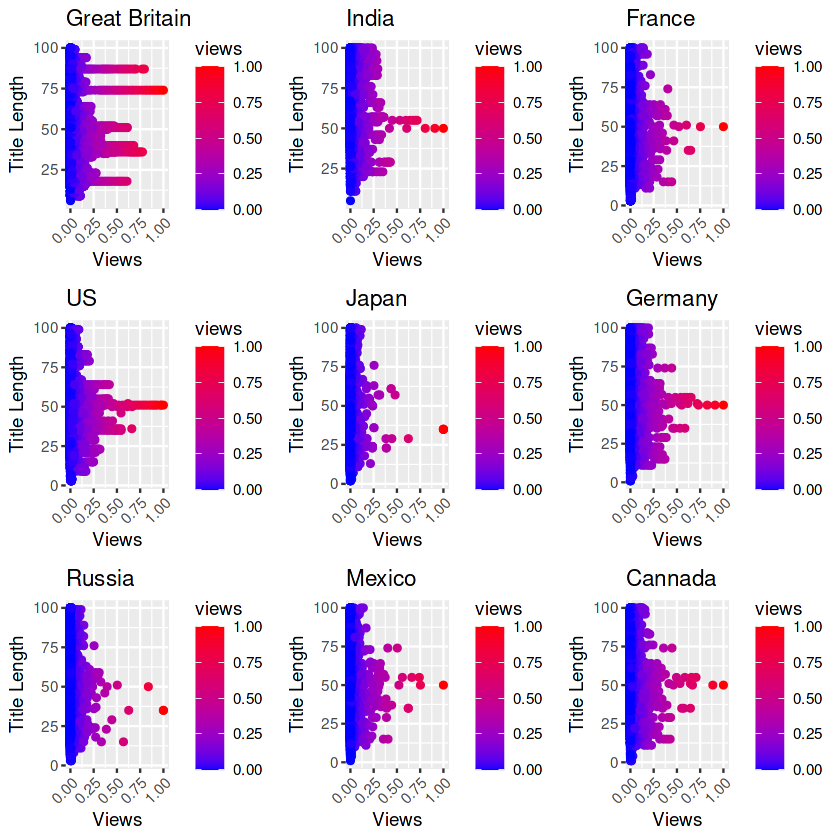

In [20]:
library(ggplot2)

# define the function to generate the plot for a single country
generate_plot <- function(country_data, country_name) {
  ggplot(data = country_data, aes(x = title_length, y = views, color = views)) +
    geom_point() +
    labs(x = "Title Length", y = "Views") +
    ggtitle(paste( country_name)) +
    scale_color_gradient(low = "blue", high = "red") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    coord_flip()
}

# create a list of all the data frames
country_data <- list(GB.data_norm, India.data_norm, France.data_norm, US.data_norm, Japan.data_norm, Germany.data_norm, Russia.data_norm, Mexico.data_norm, Canada.data_norm)

# create a list of all the country names
country_names <- c("Great Britain", "India", "France", "US", "Japan", "Germany", "Russia", "Mexico", "Cannada")

# create an empty list to store the plots
plots <- list()

# loop through the data and generate a plot for each country
for(i in seq_along(country_data)) {
  plt <- generate_plot(country_data[[i]], country_names[i])
  plots[[i]] <- plt
}

# combine all the plots using grid.arrange() from the gridExtra package
library(gridExtra)
grid.arrange(grobs = plots, ncol = 3)

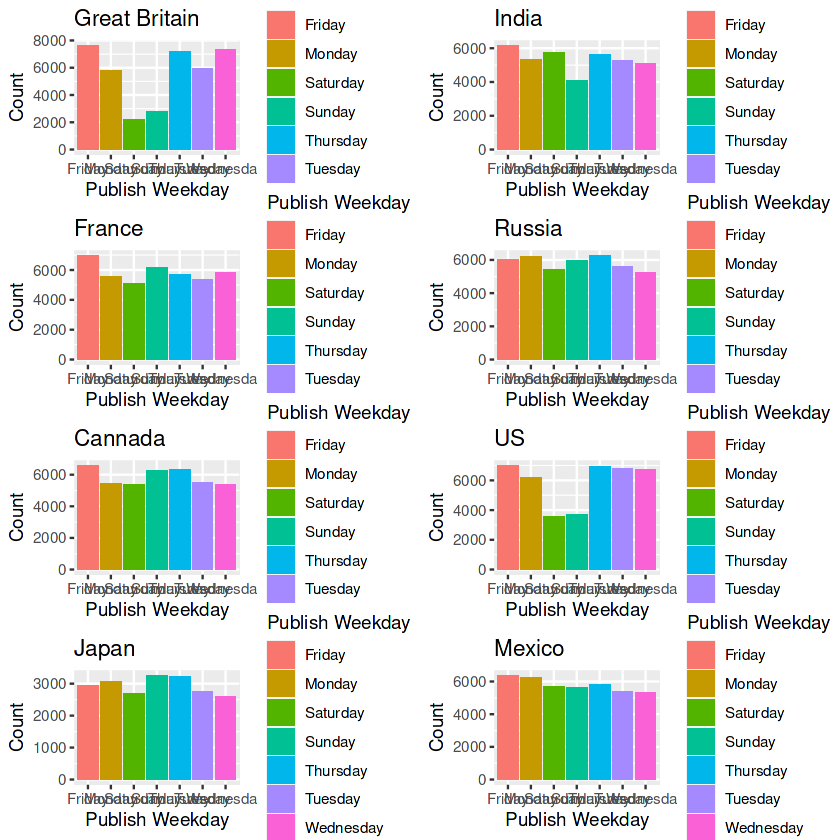

In [21]:
library(tidyverse)
library(gridExtra)

# Define function to create plot for a single country
create_weekday_plot <- function(data, country_name) {
  data$date <- as.Date.character(data$publish_time)
  plot <- data %>%
    mutate(publish_weekday = weekdays(date)) %>%
    group_by(publish_weekday) %>%
    summarise(Count = n()) %>%
    ggplot(aes(x = publish_weekday, y = Count, fill = publish_weekday)) +
    geom_col() +
    labs(x = "Publish Weekday", y = "Count") +
    ggtitle(paste0( country_name)) +
    scale_fill_discrete(name = "Publish Weekday")
  
  return(plot)
}

# Create plots for UK and India
gb_plot <- create_weekday_plot(GB.data, "Great Britain")
india_plot <- create_weekday_plot(India.data, "India")
france_plot <- create_weekday_plot(France.data, "France")
russia_plot <- create_weekday_plot(Russia.data, "Russia")
canada_plot <- create_weekday_plot(Cannada.data, "Cannada")
us_plot <- create_weekday_plot(US.data, "US")
japan_plot <- create_weekday_plot(Japan.data, "Japan")
mexico_plot <- create_weekday_plot(Mexico.data, "Mexico")

# Arrange plots on a single page
grid.arrange(gb_plot, india_plot,france_plot,russia_plot,canada_plot,us_plot,japan_plot,mexico_plot, ncol = 2)

In [37]:
GB.data$hour <- as.numeric(format(as.POSIXct(GB.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H"))
US.data$hour <- as.numeric(format(as.POSIXct(US.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H"))
India.data$hour <- as.numeric(format(as.POSIXct(India.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H"))
Mexico.data$hour <- as.numeric(format(as.POSIXct(Mexico.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H"))
France.data$hour <- as.numeric(format(as.POSIXct(France.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H"))
Japan.data$hour <- as.numeric(format(as.POSIXct(Japan.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H"))
Cannada.data$hour <- as.numeric(format(as.POSIXct(Cannada.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H"))
Russia.data$hour <- as.numeric(format(as.POSIXct(Russia.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H"))
Germany.data$hour <- as.numeric(format(as.POSIXct(Germany.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H")) 

In [35]:
colnames(India.data)
colnames(Germany.data)

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"            "title_length"           "hour"                  
[19] "trend_score"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"            "title_length"           "trend_score"

In [47]:
#GB.data$trend_score <- ((GB.data$views - mean(GB.data$views))/sd(GB.data$views)) + ((GB.data$likes - mean(GB.data$likes))/sd(GB.data$likes)) +((GB.data$comment_count - mean(GB.data$comment_count))/sd(GB.data$comment_count))
#India.data$trend_score <- ((India.data$views - mean(India.data$views))/sd(India.data$views)) + ((India.data$likes - mean(India.data$likes))/sd(India.data$likes)) +((India.data$comment_count - mean(India.data$comment_count))/sd(India.data$comment_count))
#Germany.data$trend_score <- ((Germany.data$views - mean(Germany.data$views))/sd(Germany.data$views)) + ((Germany.data$likes - mean(Germany.data$likes))/sd(Germany.data$likes)) +((Germany.data$comment_count - mean(Germany.data$comment_count))/sd(Germany.data$comment_count))
#Russia.data$trend_score <- ((Russia.data$views - mean(Russia.data$views))/sd(Russia.data$views)) + ((Russia.data$likes - mean(Russia.data$likes))/sd(Russia.data$likes)) +((Russia.data$comment_count - mean(Russia.data$comment_count))/sd(Russia.data$comment_count))
#Mexico.data$trend_score <- ((Mexico.data$views - mean(Mexico.data$views))/sd(Mexico.data$views)) + ((Mexico.data$likes - mean(Mexico.data$likes))/sd(Mexico.data$likes)) +((Mexico.data$comment_count - mean(Mexico.data$comment_count))/sd(Mexico.data$comment_count))
#Japan.data$trend_score <- ((Japan.data$views - mean(Japan.data$views))/sd(Japan.data$views)) + ((Japan.data$likes - mean(Japan.data$likes))/sd(Japan.data$likes)) +((Japan.data$comment_count - mean(Japan.data$comment_count))/sd(Japan.data$comment_count))
#US.data$trend_score <- ((US.data$views - mean(US.data$views))/sd(US.data$views)) + ((US.data$likes - mean(US.data$likes))/sd(US.data$likes)) +((US.data$comment_count - mean(US.data$comment_count))/sd(US.data$comment_count))
#Cannada.data$trend_score <- ((Cannada.data$views - mean(Cannada.data$views))/sd(Cannada.data$views)) + ((Cannada.data$likes - mean(Cannada.data$likes))/sd(Cannada.data$likes)) +((Cannada.data$comment_count - mean(Cannada.data$comment_count))/sd(Cannada.data$comment_count))
#France.data$trend_score <- ((France.data$views - mean(France.data$views))/sd(France.data$views)) + ((France.data$likes - mean(France.data$likes))/sd(France.data$likes)) +((France.data$comment_count - mean(France.data$comment_count))/sd(France.data$comment_count))



GB.hourly_trend <- aggregate(trend_score ~ as.numeric(hour), data = GB.data, FUN = mean)
India.hourly_trend <- aggregate(trend_score ~ as.numeric(hour), data = India.data, FUN = mean)
Germ.hourly_trend <- aggregate(trend_score ~ as.numeric(hour), data = Germany.data, FUN = mean)
Russiahourly_trend <- aggregate(trend_score ~ as.numeric(hour), data = Russia.data, FUN = mean)
Mexicohourly_trend <- aggregate(trend_score ~ as.numeric(hour), data = Mexico.data, FUN = mean)
Japanhourly_trend <- aggregate(trend_score ~ as.numeric(hour), data = Japan.data, FUN = mean)
US.hourly_trend <- aggregate(trend_score ~ as.numeric(hour), data = US.data, FUN = mean)
Cannada.hourly_trend <- aggregate(trend_score ~ as.numeric(hour), data =Cannada.data, FUN = mean)
France.hourly_trend <- aggregate(trend_score ~ as.numeric(hour), data =France.data, FUN = mean)

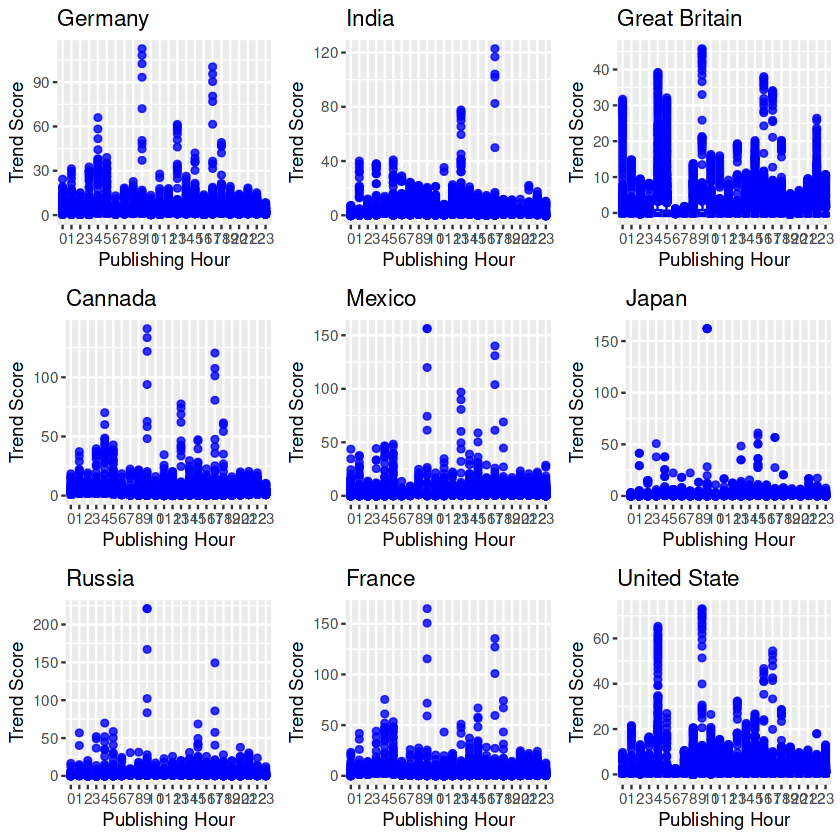

In [67]:

y1 <- ggplot(Germany.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("Germany")

y2 <- ggplot(India.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("India")

y3 <- ggplot(GB.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("Great Britain")

y4 <- ggplot(Cannada.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("Cannada")

y5 <- ggplot(Mexico.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("Mexico")

y6 <- ggplot(Japan.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("Japan")

y7 <- ggplot(Russia.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("Russia")

y8 <- ggplot(France.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("France")

y9 <- ggplot(US.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("United State")

grid.arrange(y1,y2,y3,y4,y5,y6,y7,y8,y9, ncol=)


In [71]:
library(knitr)

ggsave("Rplot001.png")
ggsave("Rplot002.png")
ggsave("Rplot003.png")
ggsave("Rplot004.png")
ggsave("Rplot005.png")
ggsave("Rplot006.png")
ggsave("Rplot007.png")
ggsave("Rplot008.png")
ggsave("Rplot009.png")

Saving 12.5 x 6.67 in image
Saving 12.5 x 6.67 in image
Saving 12.5 x 6.67 in image
Saving 12.5 x 6.67 in image
Saving 12.5 x 6.67 in image
Saving 12.5 x 6.67 in image
Saving 12.5 x 6.67 in image
Saving 12.5 x 6.67 in image
Saving 12.5 x 6.67 in image


In [73]:
include_graphics('Rplot001.png')
include_graphics('Rplot001.png')
include_graphics('Rplot001.png')

[1] "Rplot001.png"
attr(,"class")
[1] "knit_image_paths" "knit_asis"       

[1] "Rplot001.png"
attr(,"class")
[1] "knit_image_paths" "knit_asis"       

[1] "Rplot001.png"
attr(,"class")
[1] "knit_image_paths" "knit_asis"       

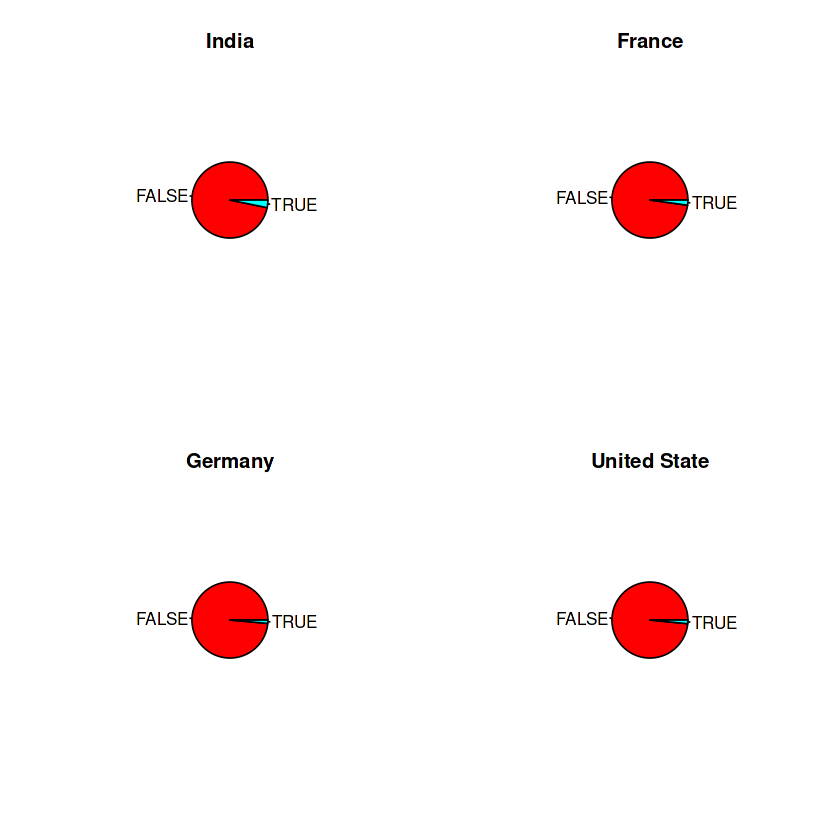

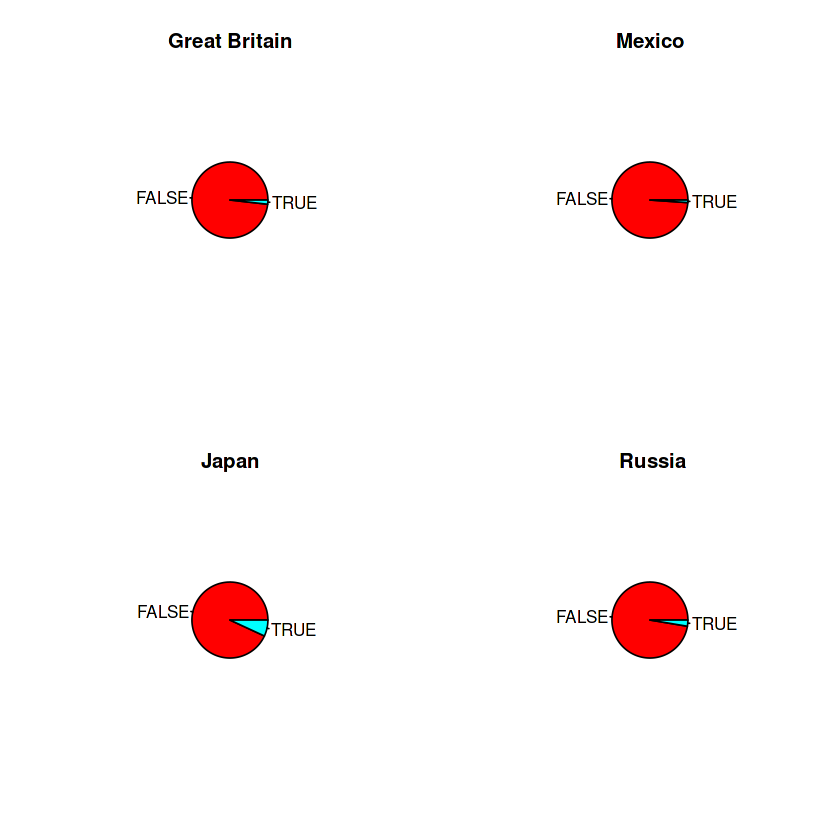

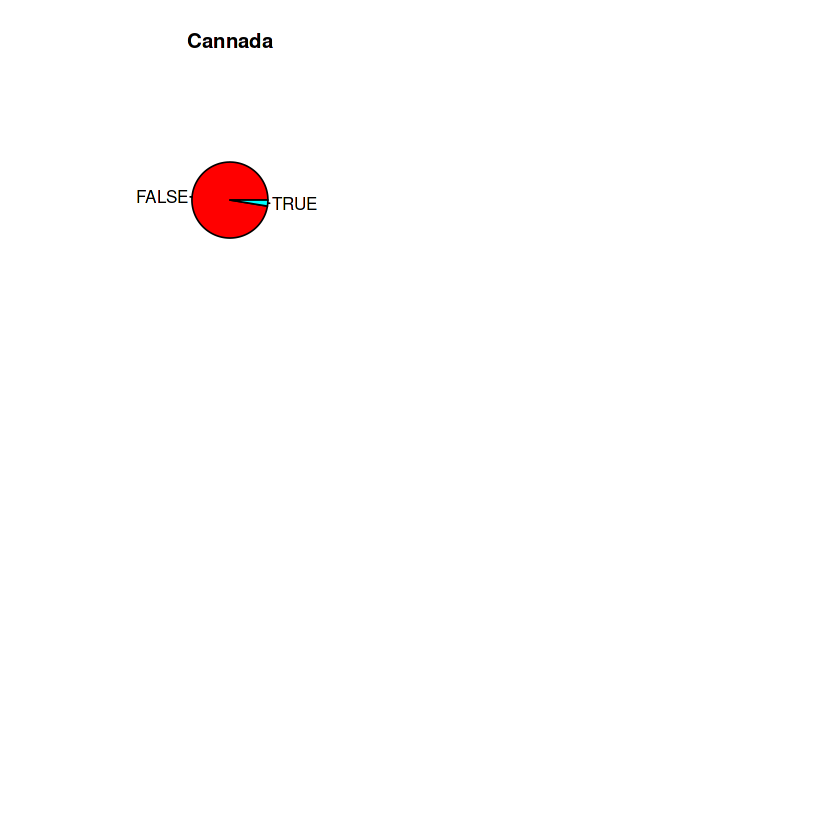

In [64]:
par(mfrow=c(2,2))
plot_comments_disabled <- function(country_data,country_name) {
  pie(table(country_data$comments_disabled), col = rainbow(2),main = paste0(country_name))
}

plot_comments_disabled(India.data,"India")
plot_comments_disabled(France.data,"France")
plot_comments_disabled(Germany.data,"Germany")
plot_comments_disabled(US.data,"United State")
plot_comments_disabled(GB.data, "Great Britain")
plot_comments_disabled(Mexico.data, "Mexico")
plot_comments_disabled(Japan.data, "Japan")
plot_comments_disabled(Russia.data," Russia")
plot_comments_disabled(Cannada.data, "Cannada")

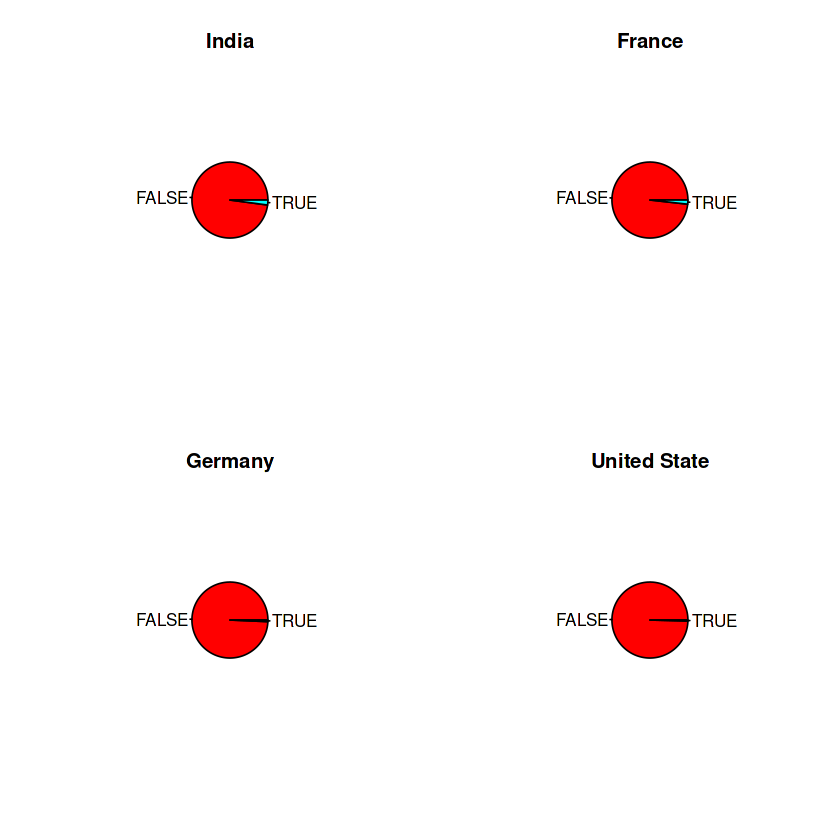

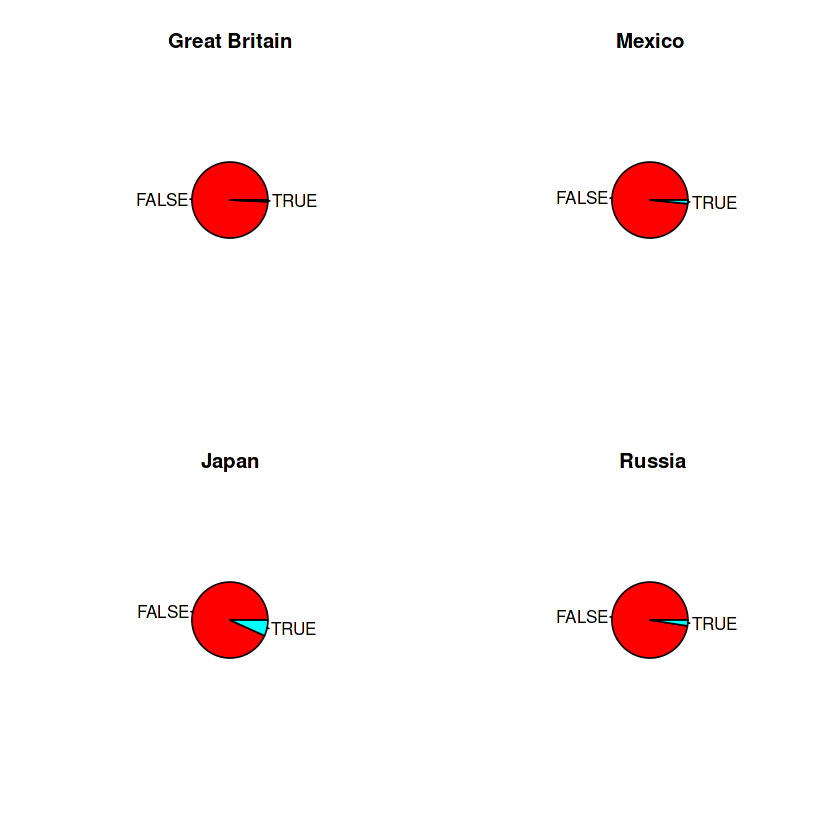

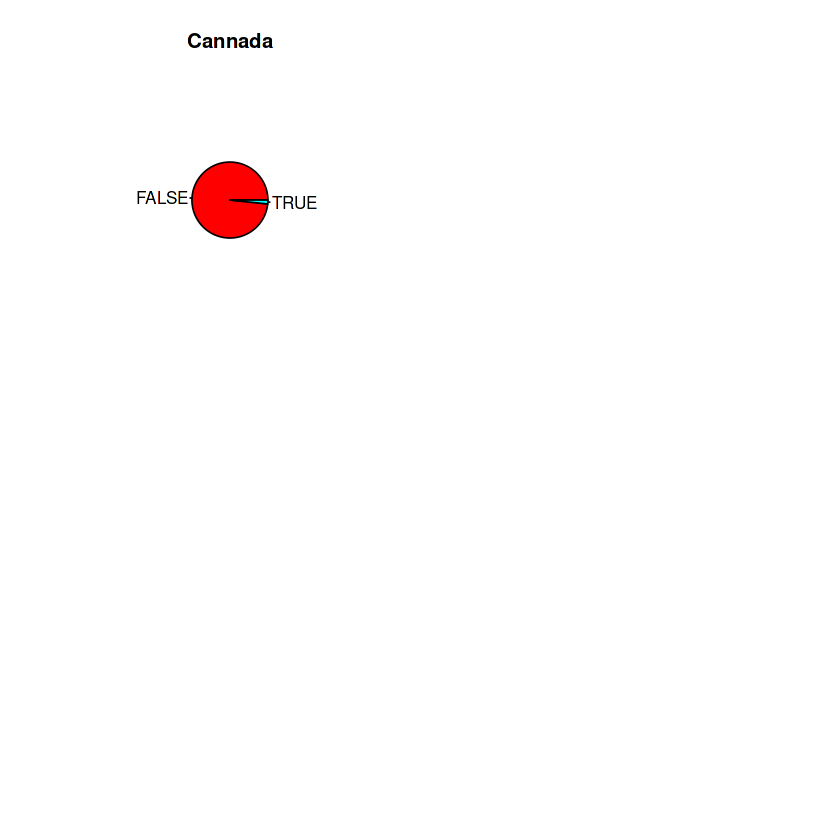

In [65]:
par(mfrow=c(2,2))
plot_ratings_disabled <- function(country_data, country_name) {
  pie(table(country_data$ratings_disabled), col = rainbow(2),main =paste0(country_name))
}


plot_ratings_disabled(India.data,"India")
plot_ratings_disabled(France.data,"France")
plot_ratings_disabled(Germany.data,"Germany")
plot_ratings_disabled(US.data,"United State")
plot_ratings_disabled(GB.data, "Great Britain")
plot_ratings_disabled(Mexico.data, "Mexico")
plot_ratings_disabled(Japan.data, "Japan")
plot_ratings_disabled(Russia.data," Russia")
plot_ratings_disabled(Cannada.data, "Cannada")